# Lab: kNN Classification of MNIST handwritten digits

We will perform one of the most tasks in machine learning research: Classifying hand-written digits in the MNIST dataset. We will compare various classification methods we have encountered so far.

I have saved the digits dataset in a format called 'pickle', which is one commonly used method for saving data or any object in Python that does not easily fit into a CSV file.

In this case, the data are images (of the hand-written digits) represented as 28 x 28 pixel arrays. Each element of an array is the intensity of a black and white image at that pixel.

Run the following code to load the dataset and explore it.

In [1]:
import pickle
import numpy as np

X = pickle.load(open('mnist_10k_X.pkl', 'rb'))
Y = pickle.load(open('mnist_10k_Y.pkl', 'rb'))

print("Shape of X:", X.shape)  # These are 28 x 28 pixel images. How many examples are there?

print("First digit in the dataset:", X[0, : :])  # look at what the first example looks like (note this is a Numpy array, NOT a Pandas DataFrame)

print("Unique digits present:", np.unique(Y))  # view the unique digits present in this dataset

Shape of X: (10000, 28, 28)
First digit in the dataset: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  60 254 255 224  59  59   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 150 253 253 253 253 253 137 118 118  27  28 118 118   9   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 119 253 253 253 253 253 253 253 253 193 195 253 253 154   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5  18  18  49 213 213 213 213 213 213 254 253 253 250 235
  114  37   0   0   0   0   0   0   0   0]
 [  0   

In [2]:
import pandas as pd
pd.value_counts(Y)

1    1183
7    1072
6    1022
4    1007
3    1001
2     980
0     967
9     953
8     945
5     870
Name: count, dtype: int64

### Visualize the digits

Since these are black and white images, where the entries in the array are grayscale intensity values, we can easily visualize the digit with plt.imshow(). Below I show you how to call it, but just know it visualizes the pixel intensities as an image.

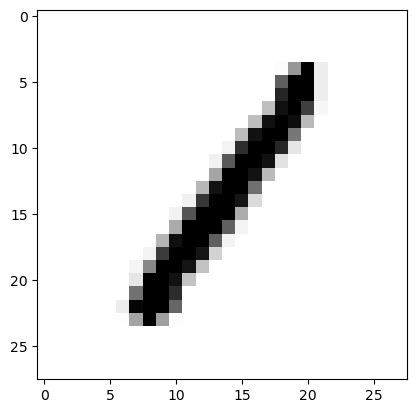

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X[1200, :, :], cmap='gray_r')  # cmap='gray_r' says to plot in grayscale and make the digit black

### Vectorize the data and train a k-nn classifier

In order to train a supervised learning model, we need to put the 28 x 28 grid into a vector. The following code does that and then fits a k-NN classifier.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

X_flattened = []
for i_ in range(len(X)):
    Xi_ = X[i_, :, :]
    Xi_flattened = Xi_.ravel()
    X_flattened.append(Xi_flattened)
    
X_flattened = np.array(X_flattened)  # turn it back into a Numpy Array

print("Shape of flattened data is:", X_flattened.shape)

k_ = 3  # first try 3 neighbors

clf = KNeighborsClassifier(n_neighbors=k_)
clf.fit(X_flattened, Y)

Shape of flattened data is: (10000, 784)


KNeighborsClassifier(n_neighbors=3)

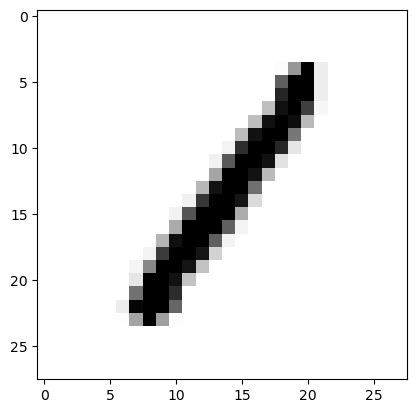

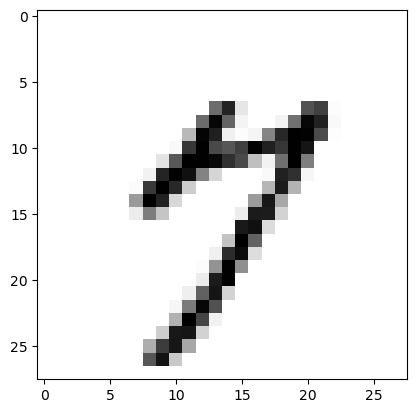

In [5]:
X_examples = X[[1200, 6000], :, :]

plt.figure()
plt.imshow(X_examples[0, :, :], cmap='gray_r')

plt.figure()
plt.imshow(X_examples[1, :, :], cmap='gray_r')

In [6]:
X_examples_flattened = []
for i_ in range(len(X_examples)):
    X_examples_flattened.append(X_examples[i_, :, :].ravel())
                                
Y_pred = clf.predict(X_examples_flattened)  # scikit-learn expects everything to be 2D, so I pass this in as a list

print("The predictions are:", Y_pred)

Y_pred_probs = clf.predict_proba(X_examples_flattened)
print("The predicted probabilities are:", Y_pred_probs)
print("Which correspond to the labels:", clf.classes_)

The predictions are: [1 7]
The predicted probabilities are: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Which correspond to the labels: [0 1 2 3 4 5 6 7 8 9]


### Cross-validating over k

This is a scikit-learn function, so you may remember from the lab in Lecture 2 how to easily perform cross validation over k using sklearn.model_selection.GridSearchCV.

The following code reminds you how to do this. Remember k-NN is an expensive algorithm so do not try too far beyond k=5 or you may end up waiting all day.

In [7]:
from sklearn.model_selection import GridSearchCV  # you may want to use this to select k in k-NN

clf = KNeighborsClassifier(n_neighbors=k_)
clf_cv = GridSearchCV(estimator=clf, param_grid={'n_neighbors': [1, 2, 3, 4, 5]})  # uses 5-fold cross validation by default

clf_cv.fit(X_flattened, Y)

print("The optimally selected parameter is:", clf_cv.best_params_)

The optimally selected parameter is: {'n_neighbors': 1}


### Note: 
In the above code, note that we did not specify a performance/evaluation metric with which to compare the different models during cross-validation. In this case, KNeighborsClassifier is using the mean accuracy as a score by default, and GridSearchCV is using 5-fold cross validation by default.


### Multiclass classification

Notice that we are doing multi-class classification, which is new for us, but is a simple generalization from the binary case. Most scikit-learn functions easily accept multi-class problems, where every unique value found in Y is treated as a different class.

The logistic regression method in scikit-learn will also readily accept Y containing multiple labels. As a performance metric you can just use the accuracy score (fraction that was classified correctly).

## Problem 1

Pull everything you have done over the labs together to experimentally compare the (multiclass) classification performance of k-NN classification, and logistic regression with L1 and L2 regularization.

In [51]:
from sklearn.linear_model import LogisticRegressionCV  # logistic regression with built in regularization. The penalty parameter is Cross-validated
from sklearn.metrics import accuracy_score
import time


n_splits = 20  # number of cross validation splits

indices = list(range(X_flattened.shape[0]))
n_train = int(len(indices) * .85)  # 85% train, 15% split

scores = {}  # this time we will use a dictionary structure to contain the errors
for model_name in ['knn1', 'knn3', 'knn5', 'logisticl1', 'logisticl2']:
    scores[model_name] = []  # initialize this dictionary entry to an empty list

# I'm lazy so I'll just do random sampling of test sets (instead of K-fold cross validation)
for i_ in range(n_splits):
    
    t_start = time.time()  # used to time things
        
    np.random.shuffle(indices)  # shuffles the list in-place, so returns nothing
    train_inds = indices[:n_train]  # the first 85% are training indices
    test_inds = indices[n_train:]  # the remaining 15% are testing indices
    
    X_train = X_flattened[train_inds, :]
    X_test = X_flattened[test_inds, :]

    Y_train = Y[train_inds]
    Y_test = Y[test_inds]
    
    # scale the predictors by the max pixel value
    for j_ in range(X_train.shape[1]):
        X_train[:, j_] = X_train[:, j_] / 256
        X_test[:, j_] = X_test[:, j_] / 256  # use the training statistics to transform the test cases
    
    clf = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=1000)
    clf.fit(X_train, Y_train)
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['logisticl1'].append(score)
    print("Finished logreg l1 split:", i_)
    
    clf = LogisticRegressionCV(penalty='l2', max_iter=1000)  # uses 5-fold cross validation by default
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #score = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['logisticl2'].append(score)
    print("Finished logreg l2 split:", i_)
    
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #auc = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['knn1'].append(score)
    print("Finished knn k=1 split:", i_)
    
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #auc = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['knn3'].append(score)
    print("Finished knn k=3 split:", i_)
    
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, Y_train)  
    #Y_pred_probs = clf.predict_proba(X_test) 
    #auc = roc_auc_score(Y_test, Y_pred_probs, multi_class='ovr')
    score = accuracy_score(Y_test, clf.predict(X_test))
    scores['knn5'].append(score)
    print("Finished knn k=5 split:", i_)
    
    t_elapsed = time.time() - t_start
    print("This split took: %.2f secs" % t_elapsed)


Finished logreg l1 split: 0
Finished logreg l2 split: 0
Finished knn k=1 split: 0
Finished knn k=3 split: 0
Finished knn k=5 split: 0
This split took: 13.39 secs
Finished logreg l1 split: 1
Finished logreg l2 split: 1
Finished knn k=1 split: 1
Finished knn k=3 split: 1
Finished knn k=5 split: 1
This split took: 13.50 secs
Finished logreg l1 split: 2
Finished logreg l2 split: 2
Finished knn k=1 split: 2
Finished knn k=3 split: 2
Finished knn k=5 split: 2
This split took: 13.78 secs
Finished logreg l1 split: 3
Finished logreg l2 split: 3
Finished knn k=1 split: 3
Finished knn k=3 split: 3
Finished knn k=5 split: 3
This split took: 14.46 secs
Finished logreg l1 split: 4
Finished logreg l2 split: 4
Finished knn k=1 split: 4
Finished knn k=3 split: 4
Finished knn k=5 split: 4
This split took: 13.78 secs
Finished logreg l1 split: 5
Finished logreg l2 split: 5
Finished knn k=1 split: 5
Finished knn k=3 split: 5
Finished knn k=5 split: 5
This split took: 13.49 secs
Finished logreg l1 split: 6


Text(0, 0.5, 'Classification accuracy')

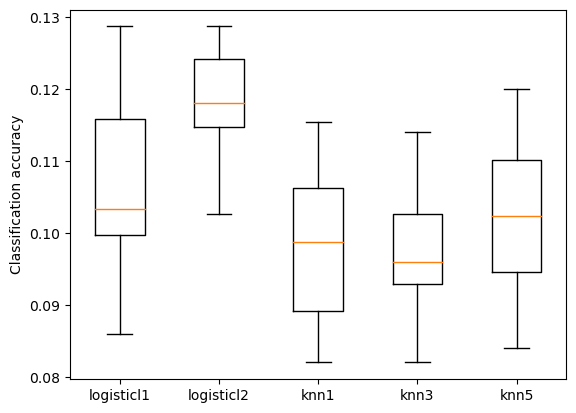

In [52]:
# plot the results
plt.figure()
plt.boxplot([scores['logisticl1'], scores['logisticl2'], scores['knn1'], scores['knn3'], scores['knn5']], 
            labels=['logisticl1', 'logisticl2', 'knn1', 'knn3', 'knn5'])
plt.ylabel('Classification accuracy')

## Challenge

Scikit-learn does not appear to have a built-in kernel smoothing module for supervised learning (do not get confused by other kernel methods such as those using Mercer kernels!)

Given all you know from the lecture, could you code up your own kernel smoothing model from scratch? If you want to challenge yourself, do it when you get home.